# LOAN APPROVAL PREDICTION USING SVM

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

data collection and preprocessing

In [2]:
# loading the dataset by using pandas
# -> 1 creating a variable for read the data

loan_data = pd.read_csv('loan.csv')

# -> check the variable type

type(loan_data)

pandas.core.frame.DataFrame

In [3]:
loan_data.shape

(614, 13)

In [4]:
# print the first 5 rows in the dataset
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# print the last 5 rows in the dataset
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# print the total number of value are missing in the dataset
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# print the statical values in the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# dropping the missing values in the dataset
loan_data = loan_data.dropna()

In [9]:
# re-check the missing values after dropping the missing values

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# label encoding in target variable changing the string value to numeric
loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
# Dependent column values
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# replacing the value of 3+ to 4
loan_data = loan_data.replace(to_replace='3+', value=4)

In [13]:
# After replacing the values in Dependents column
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

DATA VISUALIZATION

<AxesSubplot:xlabel='Education', ylabel='count'>

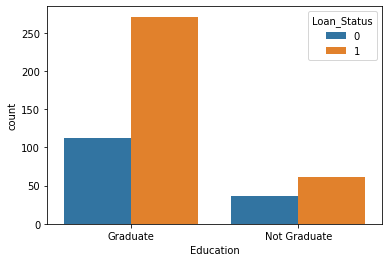

In [14]:
# education & Loan Status
sb.countplot(x='Education',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Married', ylabel='count'>

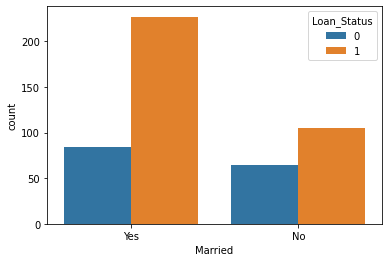

In [15]:
# marital status & Loan Status
sb.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [16]:
# convert categorical columns to numerical values
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

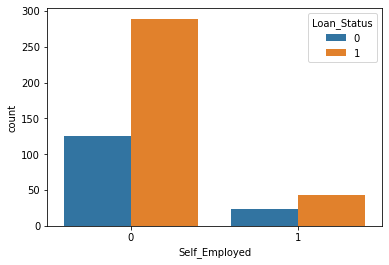

In [17]:
# Self_Employed & Loan Status
sb.countplot(x='Self_Employed', hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

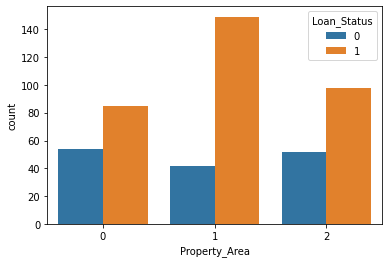

In [18]:
# Property_Area & Loan_Status
sb.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

In [19]:
# After change the dataset into numerical from
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
# separating the data and label
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [21]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [22]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train test split

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Train the model:
# SUPPORT VECTOR MACHINE

In [25]:
classifier = svm.SVC(kernel='linear')

In [32]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# MODEL EVALUATION

In [28]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [30]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334
